In [160]:
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
penguins = sns.load_dataset('penguins')

In [161]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [162]:
penguins_data = penguins.iloc[:,1:]

In [163]:
penguins_data

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [164]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [165]:
# 성별에 NaN값이 있고 팽귄 종 구분에 필요하지 않을것 같아 제외
del penguins_data['sex']

In [166]:
# 3, 339번 row가 전부 Nan 값임울 확인해여 제외
penguins_data = penguins_data.drop([3, 339])

In [167]:
# 전처리 결과 확인
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             342 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


In [168]:
# 인덱스 번호 다시 지정
penguins_data = penguins_data.reset_index()

In [169]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              342 non-null    int64  
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.2+ KB


In [170]:
type(penguins_data)

pandas.core.frame.DataFrame

In [171]:
# tensorflow, keras를 이용 서식지인 'island' 컬럼 원핫 인코딩 진행
island = penguins_data['island'].to_list()
island_lower = [island.lower() for island in island]
print(island_lower)


['torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'biscoe', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'torgersen', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dream', 'dr

In [172]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([island_lower])

In [173]:
print(tokenizer.word_index)

{'biscoe': 1, 'dream': 2, 'torgersen': 3}


In [174]:
int_encoded = tokenizer.texts_to_sequences([island_lower])

In [175]:
result_island = to_categorical(int_encoded)
print(result_island)

[[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]]


In [176]:
encoded_2d = result_island.reshape(-1, result_island.shape[-1])

result_island = pd.DataFrame(encoded_2d, columns=[f'island_{i+1}' for i in range(result_island.shape[-1])])
df_result = pd.concat([penguins_data,result_island], axis=1)

In [177]:
# 쓸모없는 컬럼 및 문자열 컬럼 제거
del df_result['index']

In [178]:
del df_result['island']

In [179]:
# 데이터 프레임 확인
df_result.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_1,island_2,island_3,island_4
0,39.1,18.7,181.0,3750.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,0.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,0.0,0.0,0.0,1.0


In [180]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

# KMeans객체 생성(클러스터 수 3)
km = KMeans(n_clusters=3, random_state=42)

# 학습하기
km.fit(df_result)

/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [181]:
km.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,

In [182]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([165,  68, 109]))

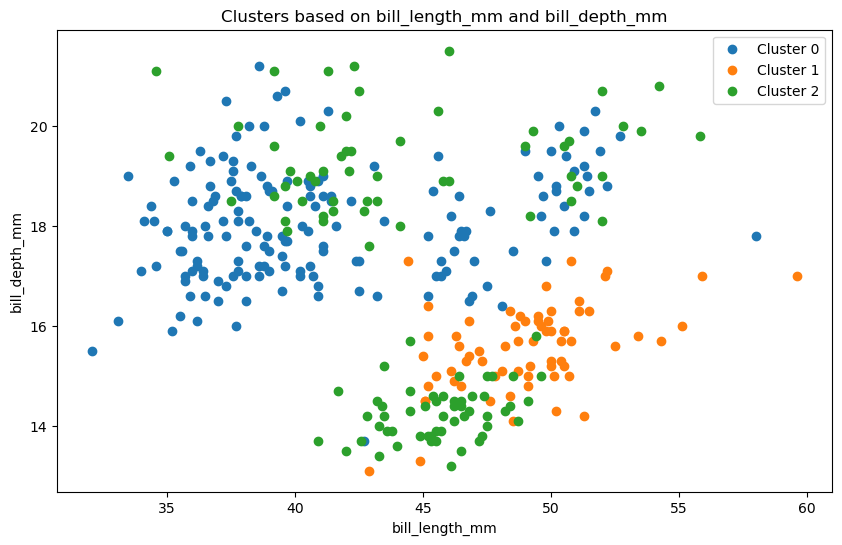

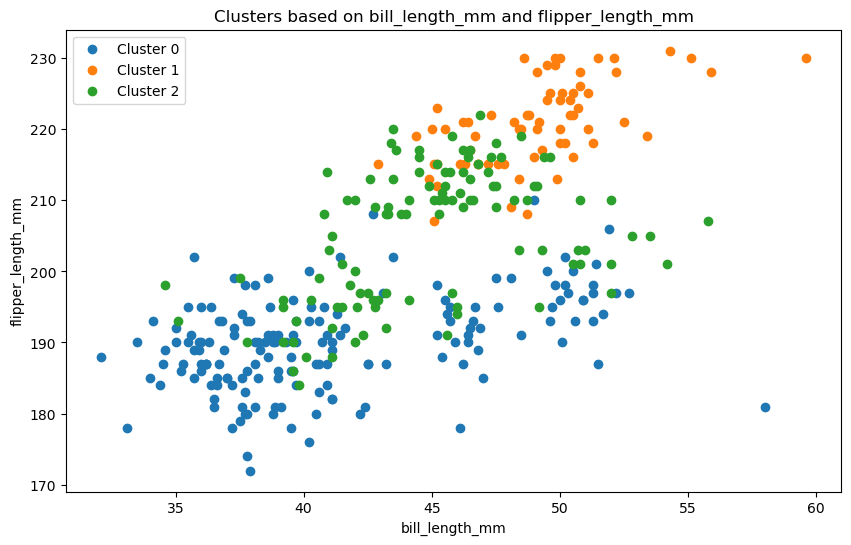

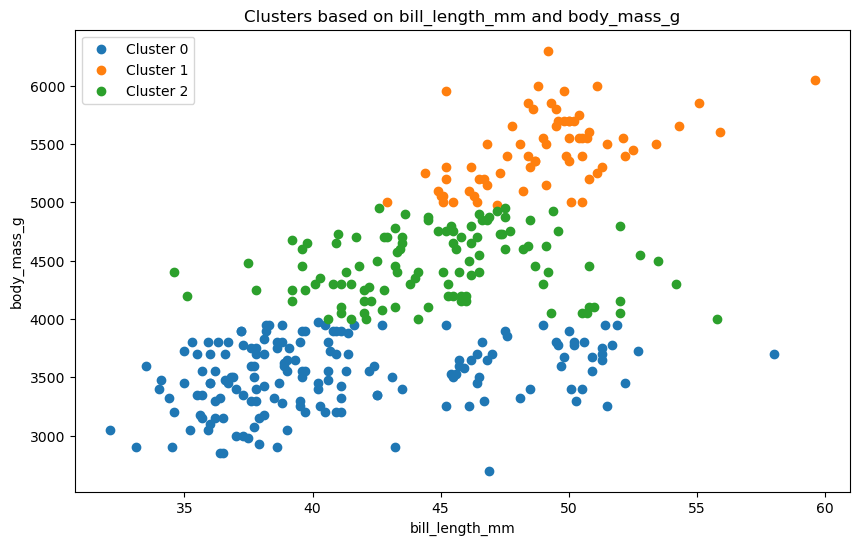

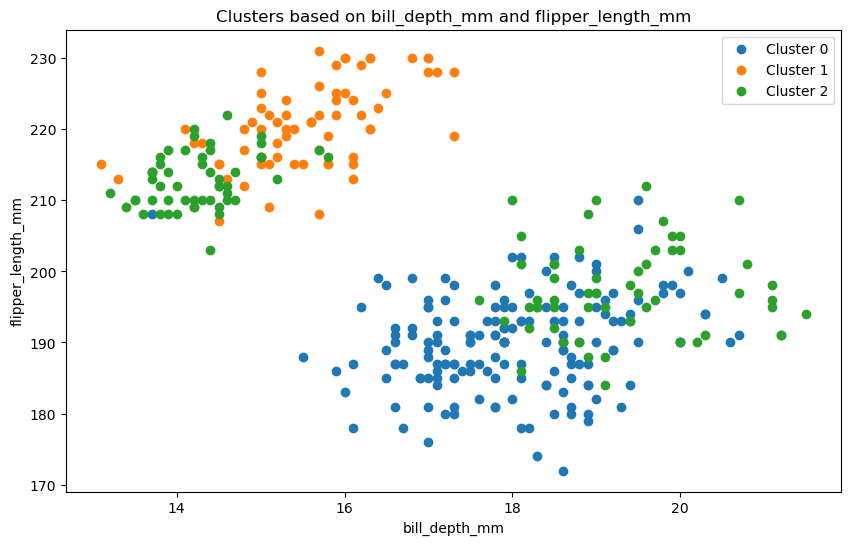

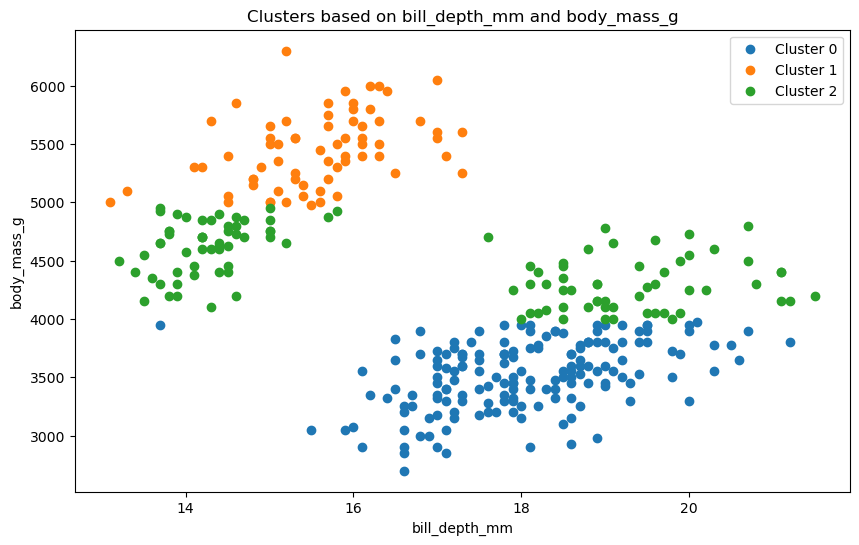

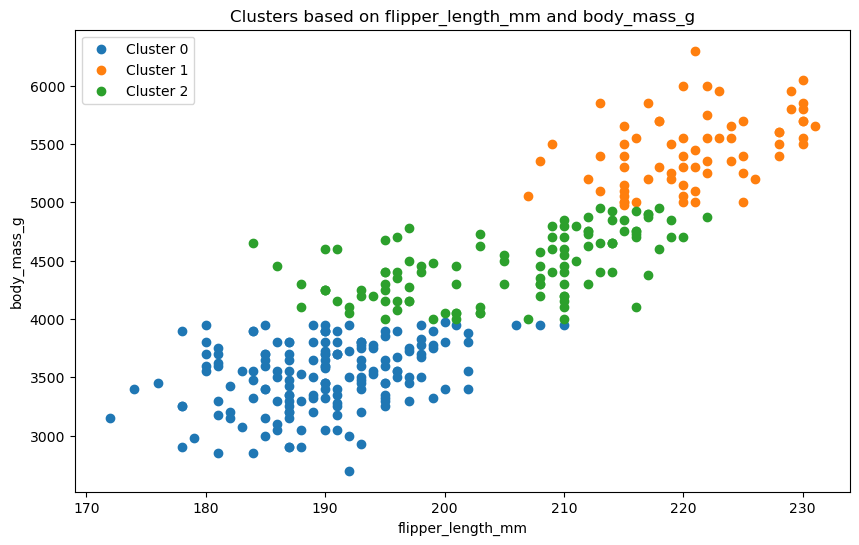

In [183]:
# 클러스터별 그래프 그리기 함수 정의
def draw_cluster_graph(df_result, km, feature1, feature2):
    plt.figure(figsize=(10, 6))
    for label in range(len(set(km.labels_))):
        plt.scatter(df_result[km.labels_ == label][feature1], df_result[km.labels_ == label][feature2], label=f'Cluster {label}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Clusters based on {feature1} and {feature2}')
    plt.legend()
    plt.show()

# 주어진 컬럼에 대해 클러스터별 그래프 그리기
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'] #'island_1', 'island_2', 'island_3', 'island_4']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        draw_cluster_graph(df_result, km, features[i], features[j])

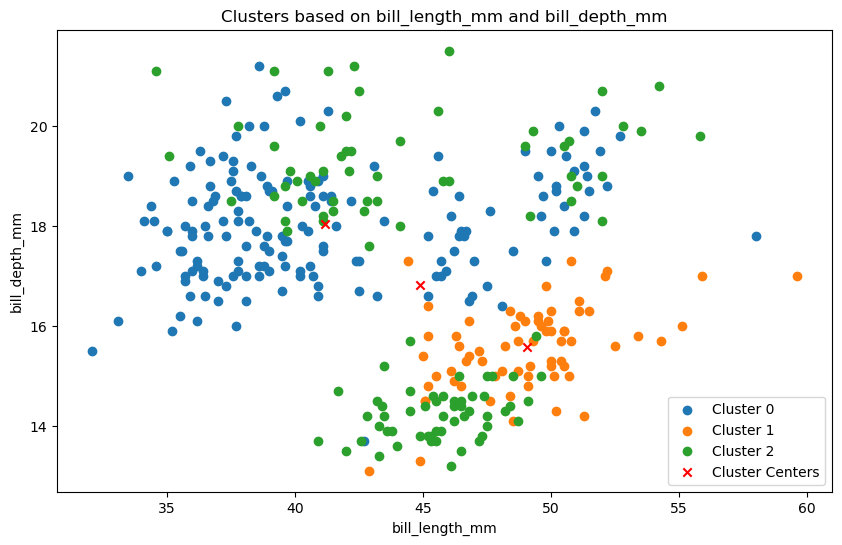

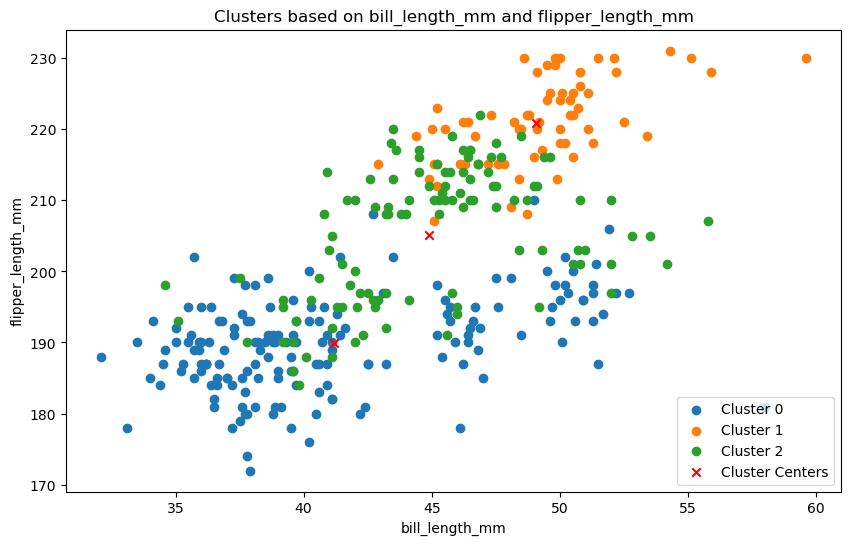

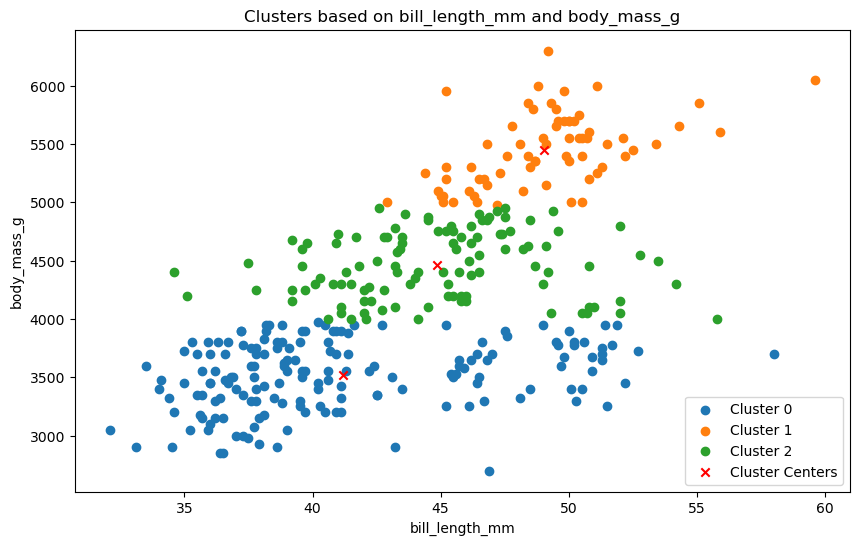

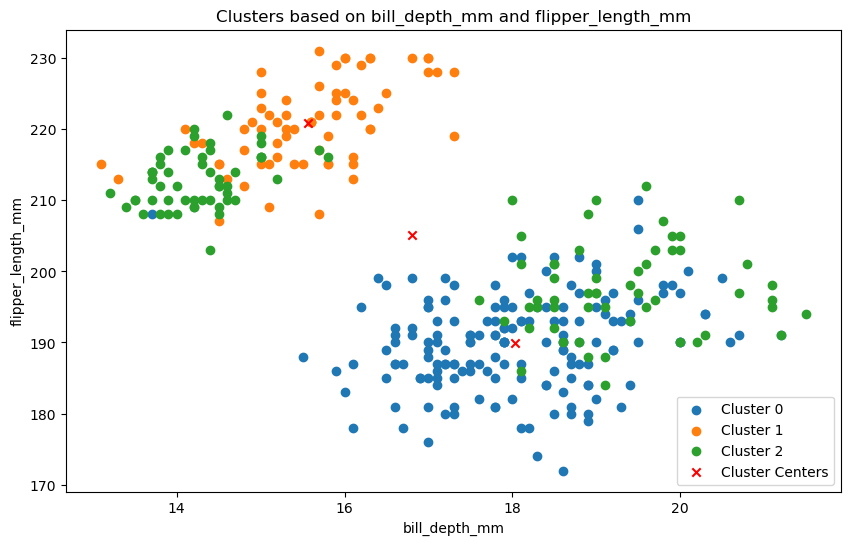

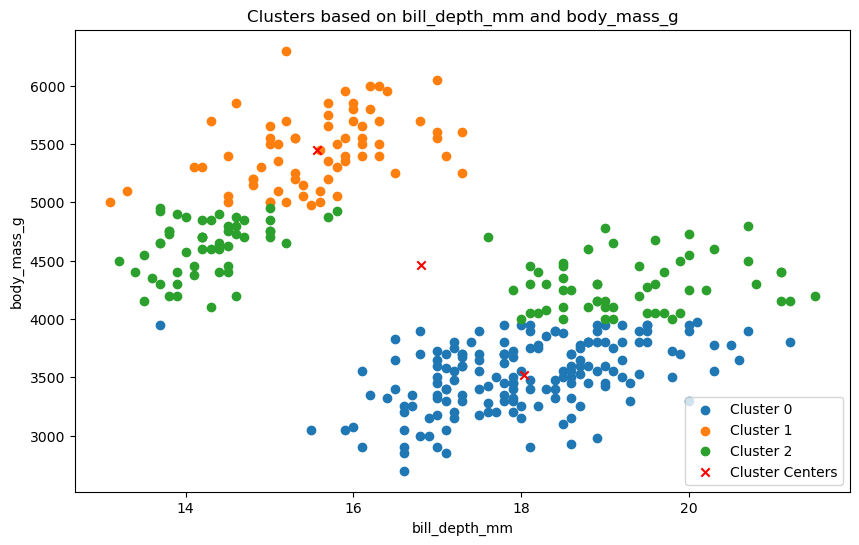

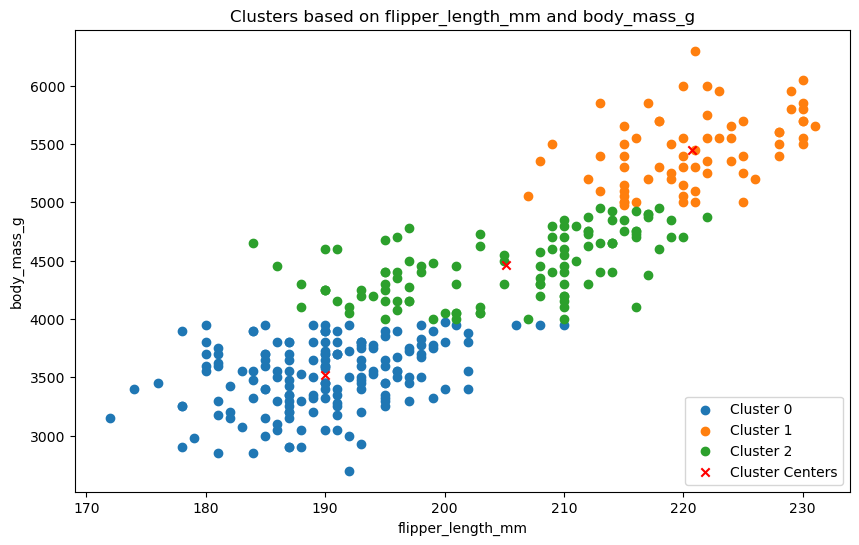

In [184]:
# 클러스터별 그래프 그리기 함수 정의
def draw_cluster_graph(df_result, km, feature1, feature2):
    plt.figure(figsize=(10, 6))
    for label in range(len(set(km.labels_))):
        plt.scatter(df_result[km.labels_ == label][feature1], df_result[km.labels_ == label][feature2], label=f'Cluster {label}')
    # 클러스터 중심점 추가
    plt.scatter(km.cluster_centers_[:, df_result.columns.get_loc(feature1)], 
                km.cluster_centers_[:, df_result.columns.get_loc(feature2)], 
                marker='x', color='r', label='Cluster Centers')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Clusters based on {feature1} and {feature2}')
    plt.legend(loc='lower right')
    plt.show()

# 주어진 컬럼에 대해 클러스터별 그래프 그리기
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        draw_cluster_graph(df_result, km, features[i], features[j])

In [185]:
df_result[150:151]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_1,island_2,island_3,island_4
150,41.5,18.5,201.0,4000.0,0.0,0.0,1.0,0.0


In [186]:
# 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transfrom() 사용
km.transform(df_result[150:151])

array([[ 481.94546326, 1449.79040282,  458.06269119]])

In [187]:
# 예측하기
km.predict(df_result[150:151])

array([2], dtype=int32)

In [190]:
km.n_iter_

5

In [189]:
km.labels_[150:151]

array([2], dtype=int32)

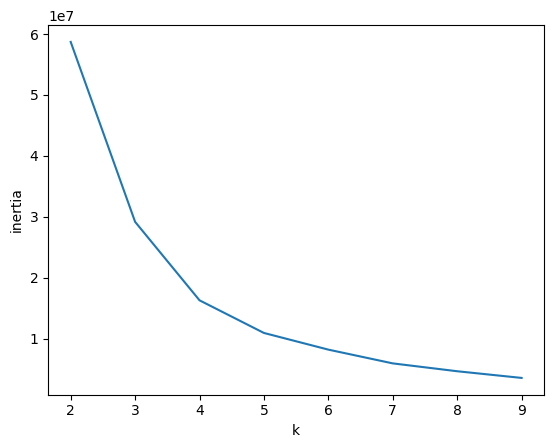

In [191]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init= 10)
    km.fit(df_result)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()